In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install dataframe-image
import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df_stat = df.describe().T
df_stat

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [8]:
# dfi.export(df_stat, 'stat.png')

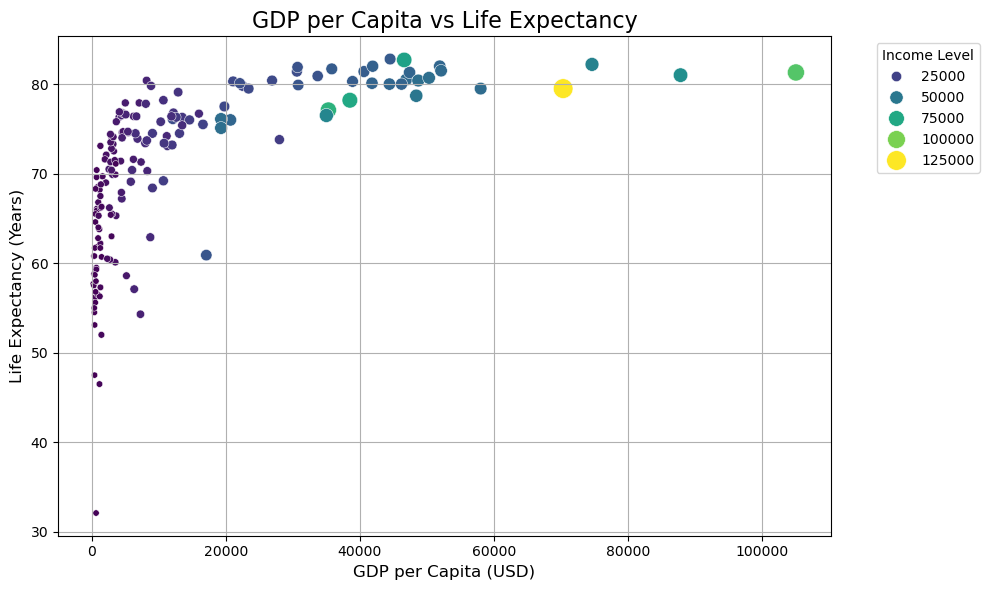

In [9]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='gdpp', 
    y='life_expec', 
    data=df, 
    hue='income', 
    size='income', 
    palette='viridis', 
    sizes=(20, 200)
)

# Customize the plot
scatter_plot.set_title('GDP per Capita vs Life Expectancy', fontsize=16)
scatter_plot.set_xlabel('GDP per Capita (USD)', fontsize=12)
scatter_plot.set_ylabel('Life Expectancy (Years)', fontsize=12)
scatter_plot.legend(title='Income Level', loc='upper left', bbox_to_anchor=(1.05, 1))
scatter_plot.grid(True)

# Adjust layout for readability
plt.tight_layout()

# Save and display the plot
plt.savefig("scatterplot.png")
plt.show()

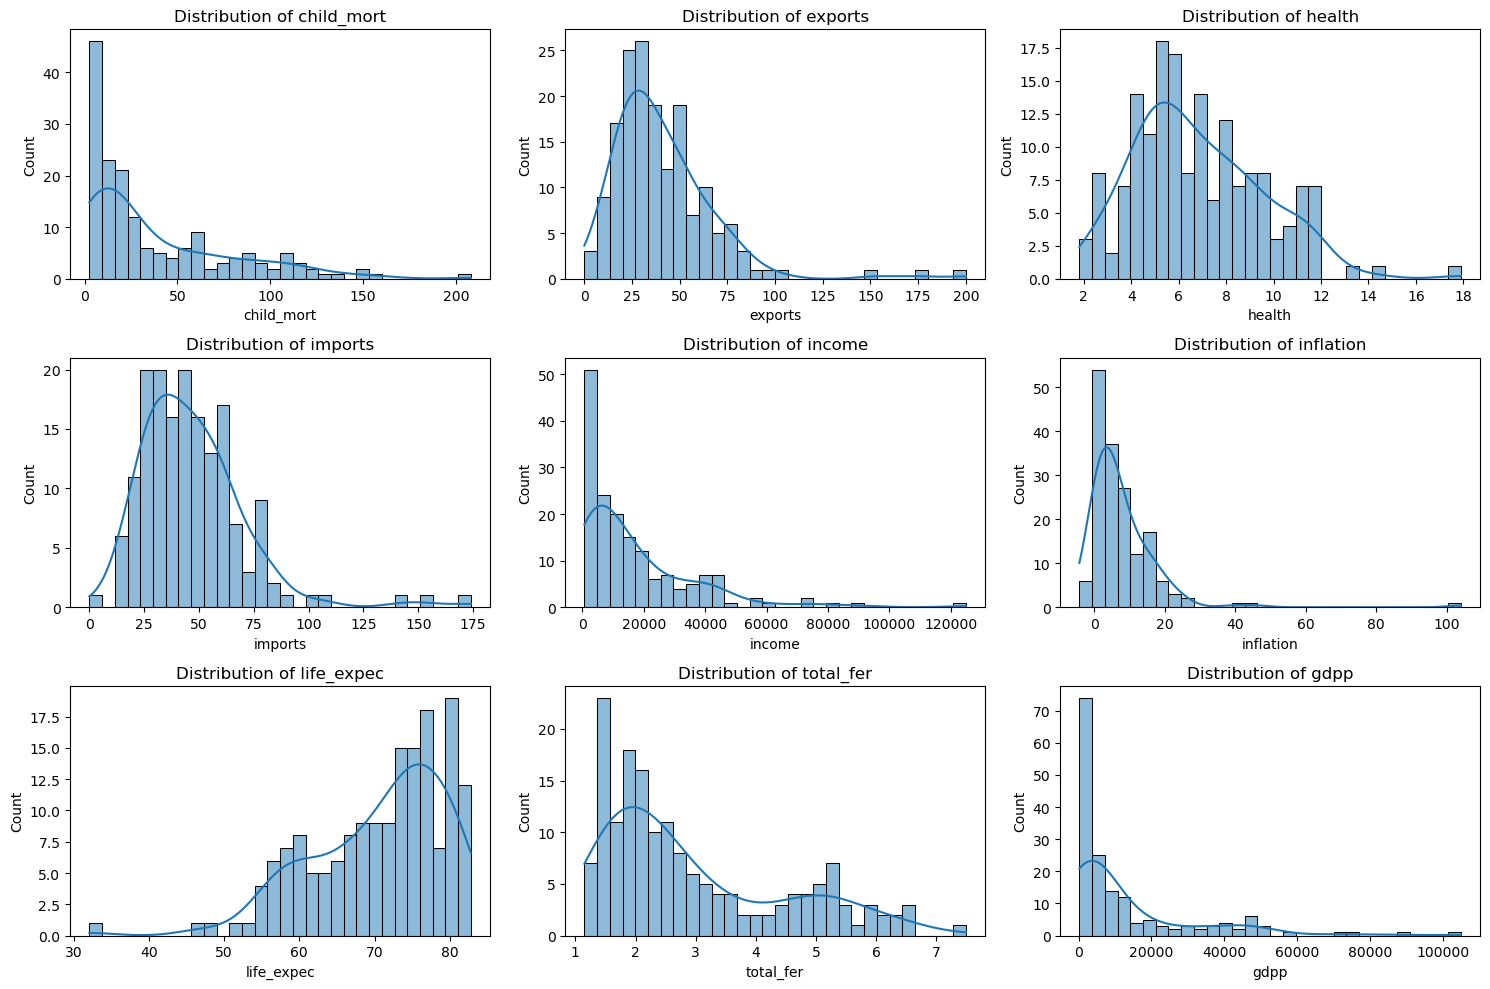

In [27]:
# Visualize distributions
numeric_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
    
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout() 
plt.savefig("distribution.png")
plt.show()

In [28]:
income_groups = pd.qcut(df['income'], q=3, labels=["Low Income", "Middle Income", "High Income"])
df['income_group'] = income_groups

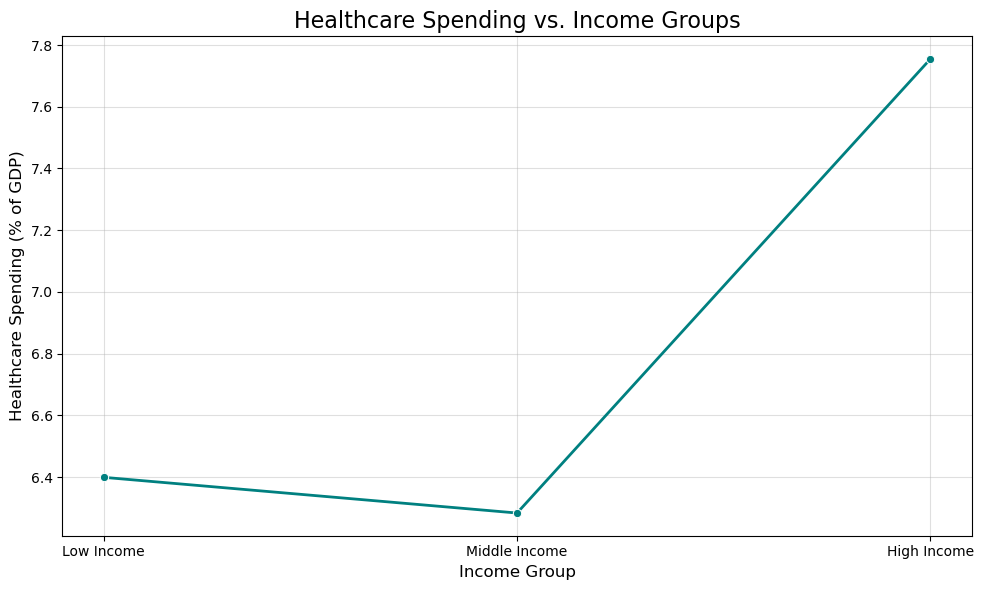

In [29]:
plt.figure(figsize=(10, 6))

# Aggregate data by income groups (e.g., mean healthcare spending)
avg_health_spending = df.groupby('income_group')['health'].mean().reset_index()

# Line plot for healthcare spending
sns.lineplot(data=avg_health_spending, x='income_group', y='health', marker='o', linewidth=2, color='teal')

# Customizing the plot
plt.title("Healthcare Spending vs. Income Groups", fontsize=16)
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Healthcare Spending (% of GDP)", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()

# Show the plot
plt.savefig("line.png")
plt.show()


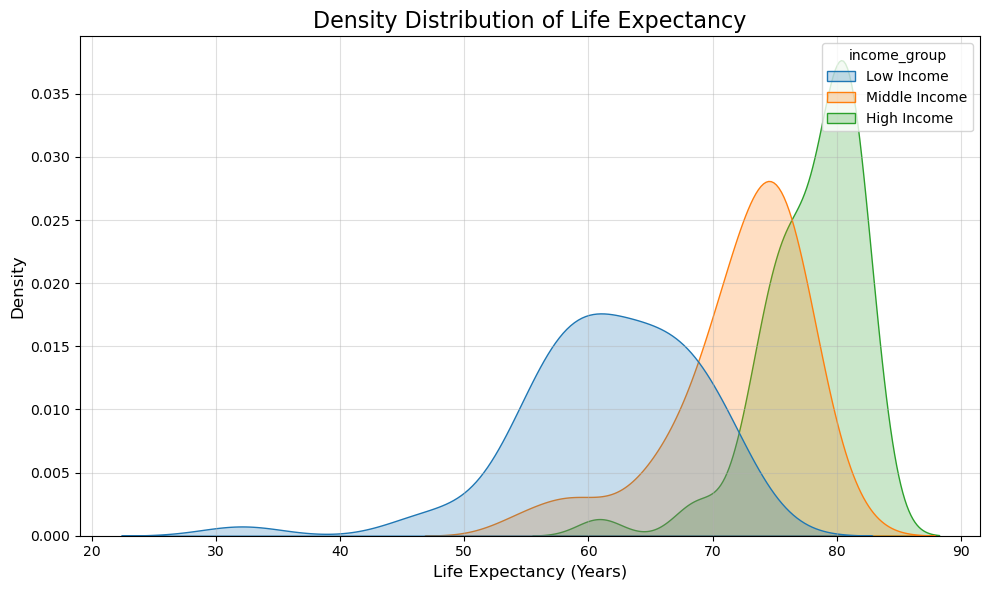

In [26]:
# Example: Density plot for life expectancy
plt.figure(figsize=(10, 6))
# sns.kdeplot(df['life_expec'], shade=True, color="blue", label='Life Expectancy')
sns.kdeplot(data=df, x="life_expec", hue="income_group",shade=True)


# Customize the plot
plt.title("Density Distribution of Life Expectancy", fontsize=16)
plt.xlabel("Life Expectancy (Years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
# plt.legend(loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig('densityplot.png')
plt.show()

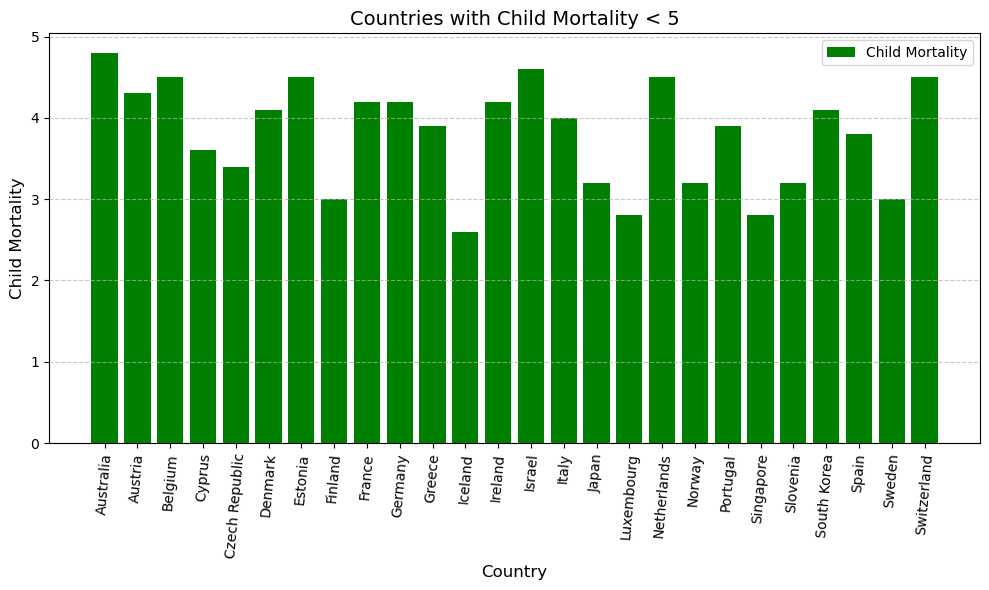

In [41]:
# Filter countries with child mortality less than 5
low_mort_data = df[df['child_mort'] < 5]

# Plot: Bar chart for countries with child mortality < 5
plt.figure(figsize=(10, 6))
plt.bar(low_mort_data['country'], low_mort_data['child_mort'], color='green', label='Child Mortality')
plt.title("Countries with Child Mortality < 5", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Child Mortality", fontsize=12)
plt.xticks(rotation=85)  # Rotate country names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

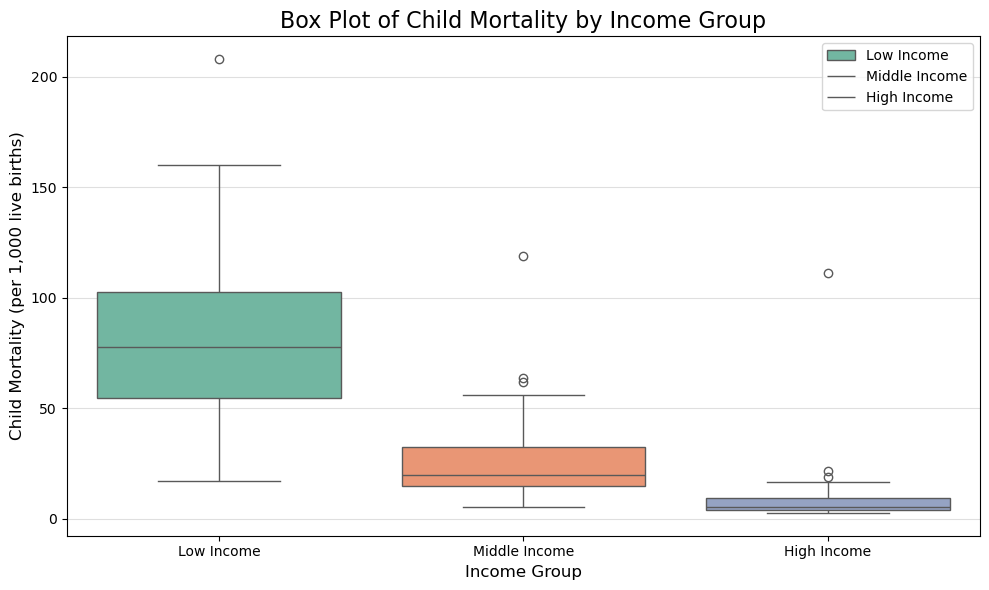

In [27]:
# Create box plot for child mortality grouped by income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income_group', y='child_mort', palette='Set2')

# Customize the plot
plt.title("Box Plot of Child Mortality by Income Group", fontsize=16)
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Child Mortality (per 1,000 live births)", fontsize=12)
plt.grid(axis='y', alpha=0.4)
plt.legend(labels=["Low Income", "Middle Income", "High Income"])
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
corr_m = df.corr(numeric_only=True)
corr_m
# dfi.export(corr_m, 'corr.png')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


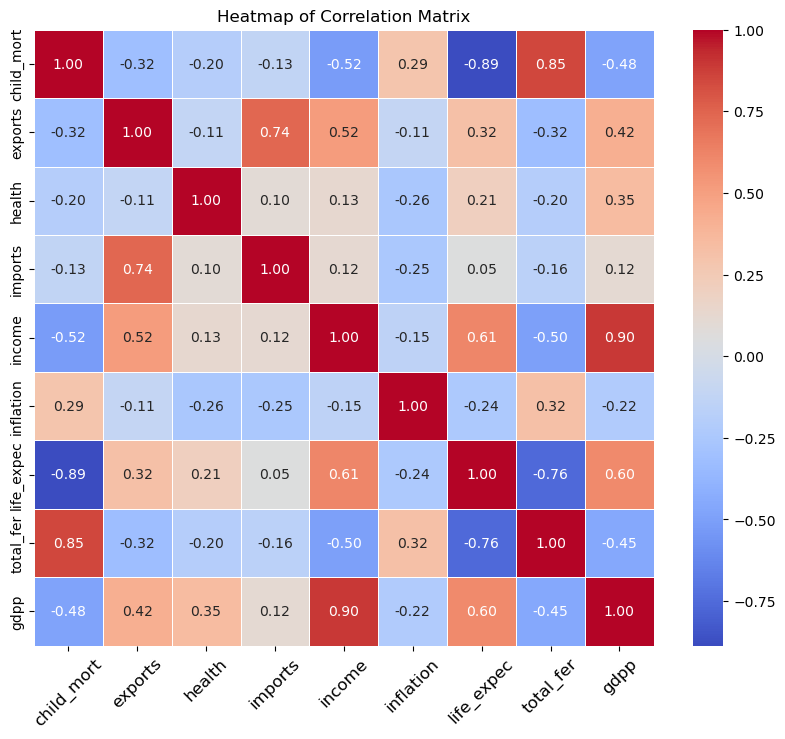

In [38]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_m, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title and labels
plt.title("Heatmap of Correlation Matrix", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=10)

# Display the plot
plt.savefig('Corr.png')
plt.show()

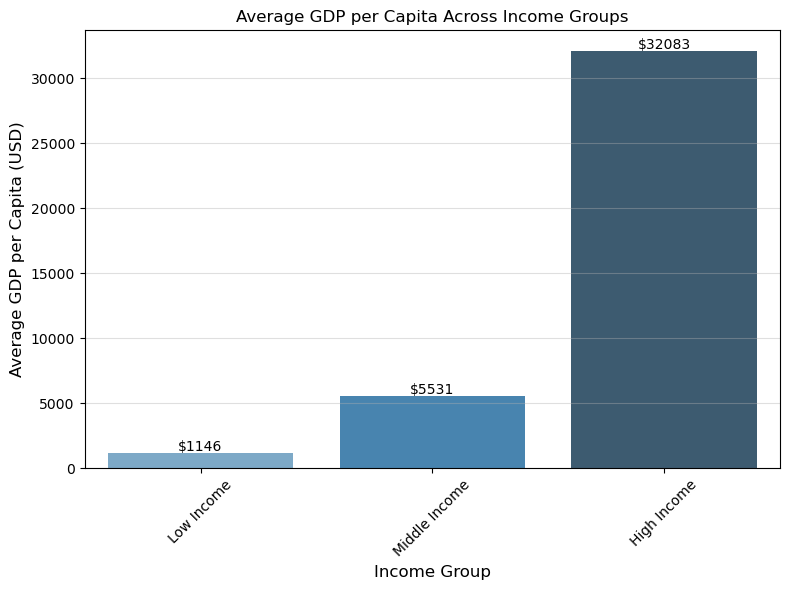

In [39]:
# Aggregate data by income group
avg_gdp_per_capita = df.groupby('income_group')['gdpp'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_gdp_per_capita, x='income_group', y='gdpp', palette='Blues_d')

# Customize the plot
plt.title("Average GDP per Capita Across Income Groups", fontsize=12)
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Average GDP per Capita (USD)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# plt.legend(labels=["Low Income", "Middle Income", "High Income"])
plt.grid(axis='y', alpha=0.4)

# Add annotations on top of bars
for i, row in avg_gdp_per_capita.iterrows():
    plt.text(i, row['gdpp'] + 200, f"${row['gdpp']:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
